In [1]:
import  glob 
import  numpy  as  np 
import  os 
import  shutil

np.random.seed (42)

In [2]:
#Cargando datos 

files = glob.glob('train/*')

cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn]
len(cat_files), len(dog_files)

(12500, 12500)

In [3]:
#Separando datos y preparando nuestro dataset

cat_train = np.random.choice(cat_files, size=1500, replace=False)
dog_train = np.random.choice(dog_files, size=1500, replace=False)
cat_files = list(set(cat_files) - set(cat_train))
dog_files = list(set(dog_files) - set(dog_train))

cat_val = np.random.choice(cat_files, size=500, replace=False)
dog_val = np.random.choice(dog_files, size=500, replace=False)
cat_files = list(set(cat_files) - set(cat_val))
dog_files = list(set(dog_files) - set(dog_val))

cat_test = np.random.choice(cat_files, size=500, replace=False)
dog_test = np.random.choice(dog_files, size=500, replace=False)

print('Cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('Dog datasets:', dog_train.shape, dog_val.shape, dog_test.shape)

Cat datasets: (1500,) (500,) (500,)
Dog datasets: (1500,) (500,) (500,)


In [6]:
#Escribiendo datos 

train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

train_files = np.concatenate([cat_train, dog_train])
validate_files = np.concatenate([cat_val, dog_val])
test_files = np.concatenate([cat_test, dog_test])

os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

for fn in train_files:
    shutil.copy(fn, train_dir)

for fn in validate_files:
    shutil.copy(fn, val_dir)
    
for fn in test_files:
    shutil.copy(fn, test_dir)

In [4]:
#importando librerias

import tensorflow as tf
import  glob 
import  numpy  as  np 
import  matplotlib.pyplot  as  plt 
from  keras.preprocessing.image  import  ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib en línea

Using TensorFlow backend.
UsageError: unrecognized arguments: línea


In [5]:
#Cargando datos

IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


(150, 150, 3)


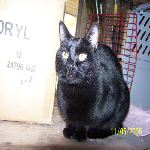

In [6]:
#Escalando imagenes

train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [7]:
#Configurando hiperparametros

batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


In [8]:
#Modelo CNN desde cero

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [9]:
#Entrenamiento del modelo

history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 13s 4ms/step - loss: 1.1323 - accuracy: 0.5357 - val_loss: 0.6736 - val_accuracy: 0.5540
Epoch 2/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.6536 - accuracy: 0.6393 - val_loss: 0.6188 - val_accuracy: 0.6360
Epoch 3/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.5566 - accuracy: 0.7153 - val_loss: 0.6936 - val_accuracy: 0.6370
Epoch 4/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4774 - accuracy: 0.7780 - val_loss: 0.5719 - val_accuracy: 0.7330
Epoch 5/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3813 - accuracy: 0.8253 - val_loss: 0.5760 - val_accuracy: 0.7350
Epoch 6/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2798 - accuracy: 0.8850 - val_loss: 0.6404 - val_accuracy: 0.7410
Epoch 7/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.1980 - ac

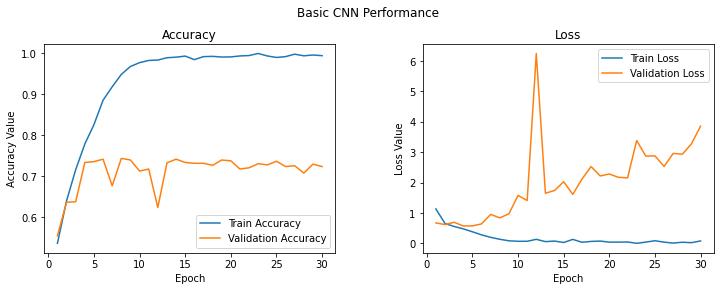

In [10]:
#Graficando resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [11]:
#Modelo CNN con regularización

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
              
              
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)    

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.6986 - accuracy: 0.5293 - val_loss: 0.6665 - val_accuracy: 0.5840
Epoch 2/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6555 - accuracy: 0.6167 - val_loss: 0.6085 - val_accuracy: 0.6640
Epoch 3/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6219 - accuracy: 0.6563 - val_loss: 0.6083 - val_accuracy: 0.6910
Epoch 4/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5840 - accuracy: 0.6947 - val_loss: 0.5784 - val_accuracy: 0.7300
Epoch 5/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5538 - accuracy: 0.7150 - val_loss: 0.5634 - val_accuracy: 0.7100
Epoch 6/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5122 - accuracy: 0.7513 - val_loss: 0.5116 - val_accuracy: 0.7710
Epoch 7/30
3000/3000 [==============================] - 6s 2ms/step - loss: 0.4682 - acc

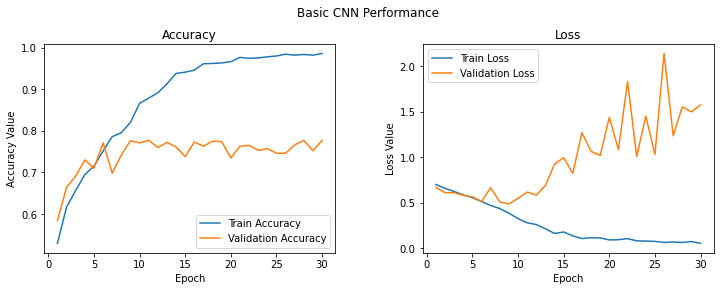

In [12]:
#Graficando Resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [13]:
model.save ('cats_dogs_basic_cnn.h5')

In [14]:
#Modelo CNN con aumento de imagen

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


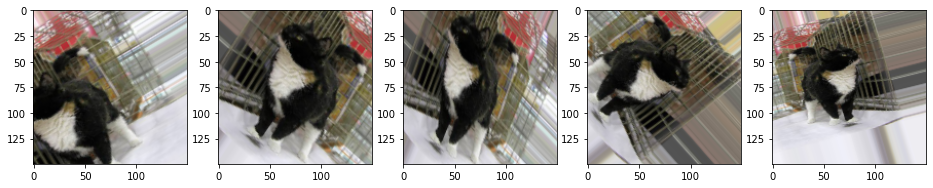

In [15]:
img_id = 3
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


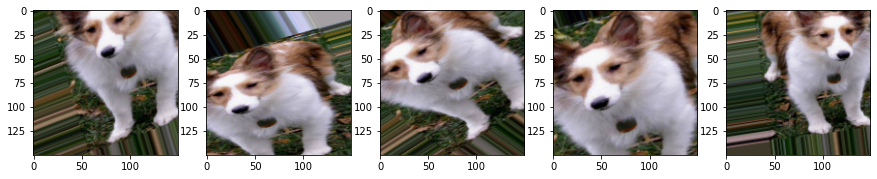

In [16]:
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [17]:
#Entrenamient de modelo CNN con regularización utilizando los generadores de datos de aumento de imagen

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6930 - accuracy: 0.5160 - val_loss: 0.6900 - val_accuracy: 0.5140
Epoch 2/100
100/100 [==============================] - 15s 153ms/step - loss: 0.6827 - accuracy: 0.5537 - val_loss: 0.6363 - val_accuracy: 0.6060
Epoch 3/100
100/100 [==============================] - 16s 157ms/step - loss: 0.6669 - accuracy: 0.5920 - val_loss: 0.8042 - val_accuracy: 0.5770
Epoch 4/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6515 - accuracy: 0.6130 - val_loss: 0.7121 - val_accuracy: 0.5940
Epoch 5/100
100/100 [==============================] - 15s 151ms/step - loss: 0.6480 - accuracy: 0.6180 - val_loss: 0.6206 - val_accuracy: 0.5650
Epoch 6/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6354 - accuracy: 0.6353 - val_loss: 0.5934 - val_accuracy: 0.6560
Epoch 7/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6324 - accuracy: 0.6437 - val_loss: 0.7460 -

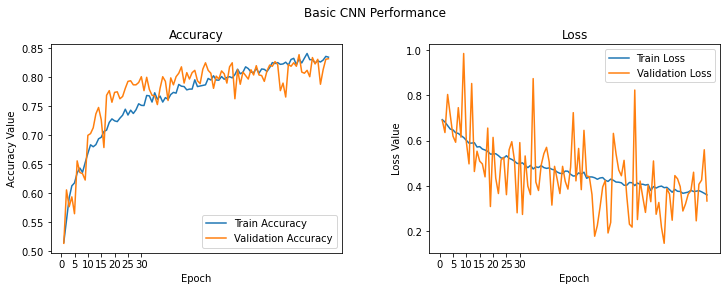

In [18]:
#Graficando resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [19]:
model.save ('cats_dogs_cnn_img_aug.h5')

In [20]:
#Carga de modelo VGG-16 y congelamiento de bloques de convolución
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

C:\Users\Roberto GB\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002081D042D08>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000002081D042E88>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000020830D85708>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000002081D0469C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000002081D046688>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000002081D041F48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000002081D044A48>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002081D044648>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000002081D047E48>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000002081D053B88>,block3_conv3,False


(1, 4, 4, 512)


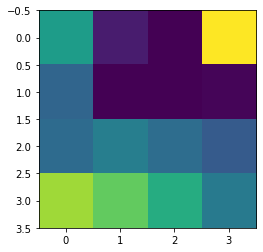

In [21]:
# características del cuello de botella para una imagen de muestra de los datos de entrenamiento.

bottleneck_feature_example = vgg.predict (train_imgs_scaled [0: 1]) 
print (bottleneck_feature_example.shape) 
plt.imshow (bottleneck_feature_example [0] [:,:, 0])

In [22]:
# extraer las características de cuello de botella de nuestros conjuntos de capacitación y validación.

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [23]:
#Construcción de la arquitectura del clasificador de redes neuronales.

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Entrenamiento del modelo

history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 1s 413us/step - loss: 0.4351 - accuracy: 0.7933 - val_loss: 0.2806 - val_accuracy: 0.8810
Epoch 2/30
3000/3000 [==============================] - 1s 343us/step - loss: 0.2872 - accuracy: 0.8767 - val_loss: 0.2560 - val_accuracy: 0.8900
Epoch 3/30
3000/3000 [==============================] - 1s 342us/step - loss: 0.2347 - accuracy: 0.8977 - val_loss: 0.2447 - val_accuracy: 0.8960
Epoch 4/30
3000/3000 [==============================] - 1s 349us/step - loss: 0.2019 - accuracy: 0.9167 - val_loss: 0.2477 - val_accuracy: 0.8940
Epoch 5/30
3000/3000 [==============================] - 1s 351us/step - loss: 0.1746 - accuracy: 0.9260 - val_loss: 0.4116 - val_accuracy: 0.8530
Epoch 6/30
3000/3000 [==============================] - 1s 346us/step - loss: 0.1520 - accuracy: 0.9360 - val_loss: 0.2658 - val_accuracy: 0.8900
Epoch 7/30
3000/3000 [==============================] - 1s 339us/step - loss

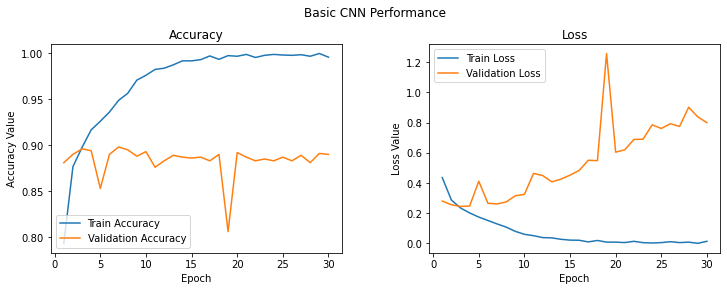

In [25]:
#Graficando resultados

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [26]:
model.save ('cats_dogs_tlearn_basic_cnn.h5')

In [41]:
#Modelo CNN pre-entrenado como un extractor de características con aumento de imagen

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [42]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100
100/100 [==============================] - 26s 263ms/step - loss: 0.6469 - accuracy: 0.6200 - val_loss: 0.5353 - val_accuracy: 0.8190
Epoch 2/100
100/100 [==============================] - 26s 259ms/step - loss: 0.5594 - accuracy: 0.7163 - val_loss: 0.4480 - val_accuracy: 0.8420
Epoch 3/100
100/100 [==============================] - 26s 259ms/step - loss: 0.5198 - accuracy: 0.7373 - val_loss: 0.3737 - val_accuracy: 0.8580
Epoch 4/100
100/100 [==============================] - 26s 259ms/step - loss: 0.4803 - accuracy: 0.7683 - val_loss: 0.3303 - val_accuracy: 0.8660
Epoch 5/100
100/100 [==============================] - 26s 260ms/step - loss: 0.4506 - accuracy: 0.7853 - val_loss: 0.1956 - val_accuracy: 0.8740
Epoch 6/100
100/100 [==============================] - 26s 261ms/step - loss: 0.4377 - accuracy: 0.7907 - val_loss: 0.3817 - val_accuracy: 0.8750
Epoch 7/100
100/100 [==============================] - 26s 262ms/step - loss: 0.4220 - accuracy: 0.8073 - val_loss: 0.4760 -

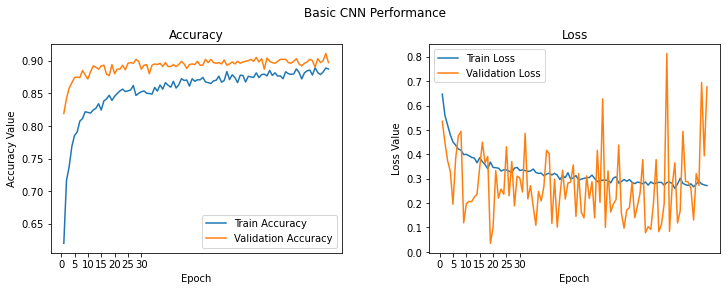

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [38]:
model.save ('cats_dogs_tlearn_img_aug_cnn.h5')

In [31]:
#Modelo CNN pre-entrenado con ajuste fino y aumento de imagen

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000002081D042D08>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000002081D042E88>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x0000020830D85708>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000002081D0469C8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000002081D046688>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000002081D041F48>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000002081D044A48>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000002081D044648>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000002081D047E48>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000002081D053B88>,block3_conv3,False


In [32]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)      

Epoch 1/100
100/100 [==============================] - 39s 386ms/step - loss: 0.5991 - accuracy: 0.6667 - val_loss: 0.5323 - val_accuracy: 0.8100
Epoch 2/100
100/100 [==============================] - 37s 372ms/step - loss: 0.4296 - accuracy: 0.8063 - val_loss: 0.0817 - val_accuracy: 0.8810
Epoch 3/100
100/100 [==============================] - 37s 372ms/step - loss: 0.3342 - accuracy: 0.8567 - val_loss: 0.0892 - val_accuracy: 0.9170
Epoch 4/100
100/100 [==============================] - 37s 372ms/step - loss: 0.2981 - accuracy: 0.8713 - val_loss: 0.2476 - val_accuracy: 0.9350
Epoch 5/100
100/100 [==============================] - 37s 373ms/step - loss: 0.2665 - accuracy: 0.8937 - val_loss: 0.2947 - val_accuracy: 0.9300
Epoch 6/100
100/100 [==============================] - 37s 373ms/step - loss: 0.2479 - accuracy: 0.8993 - val_loss: 0.6469 - val_accuracy: 0.8670
Epoch 7/100
100/100 [==============================] - 37s 374ms/step - loss: 0.2193 - accuracy: 0.9107 - val_loss: 0.1643 -

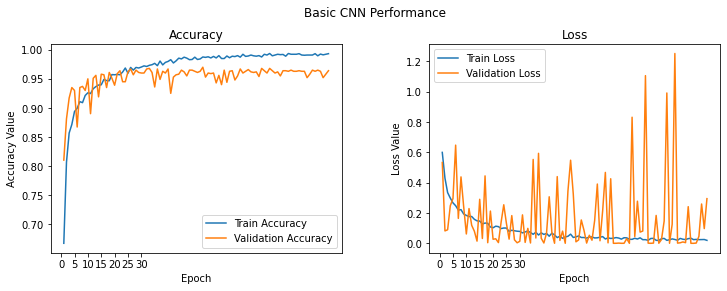

In [33]:
#Graficando resultados
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [34]:
model.save ('cats_dogs_tlearn_finetune_img_aug_cnn.h5')